# Project: Medical Appointment No Shows

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
### Dataset Description :
- This dataset includes information about over 100,000 medical appointments of different patients from different neighborhoods in Brazil, and this dataset discuss very important point that why a person makes a doctor appointment, receives all the instructions and no-show.

### Dataset columns Description :
>- **PatienID:** number identification of a patient
>- **AppointmentID:**	number	identification of each appointment
>- **Gender:**	F or M	it says 'F' if female or 'M' if man
>- **ScheduledDay:**	date	tells us on what day the patient set up their appointment
>- **AppointmentDay:**	date	the day of the actuall appointment, when they have to visit the doctor
>- **Age:**	number	how old is the patient
>- **Neighbourhood:**	string	indicates the location of the hospital
>- **Scholarship:**	0 or 1	indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família
>- **Hipertension:**	0 or 1	indicates if the patient has hipertension
>- **Diabetes:**	0 or 1	indicates if the patient has diabetes
>- **Alcoholism:**	0 or 1	indicates if the patient is an alcoholic
>- **Handcap:**	0 or 1	indicates if the patient is handicaped
>- **SMS_received:**	0 or 1	1 or more messages sent to the patient
>- **No-show:**	Yes or No	it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up

### so I will ask questions and answer it using EDA to reach the solution for this problem.
>- 1- What is the percentage of patients who show up on their appointements vs. who don't?
>- 2- Do certain gender has more commitment to medical schedules than the other one?
>- 3- Is the duration between regestiration and appointment affect the ability to show up ?
>- 4- Where is the most appointments take place?
>- 5- What is age distribution of diabetes who showed and did not show up?


**Let's imoprt our libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')

<a id='wrangling'></a>
## Data Wrangling

In [2]:
# Load our dataset
df_file = "E:/iti/FWD/FWD_PROJ/KaggleV2-May-2016.csv"
df = pd.read_csv(df_file)

In [3]:
#First we will see size of our data
df_size=df.shape
df_rows,df_columns=df_size
print("We have total numbers of {} rows and {} columns  ".format(df_rows,df_columns))

We have total numbers of 110527 rows and 14 columns  


In [4]:
#Let's view our data
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
# Another view of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


## From those two views we find  some initial observations:
- 1- There are 13 independent variables and one dependent (no_show) in the dataset.
- 2- We don't have any missing values 
- 3- Some Columns name should be changed 
- 4- PatientId & AppointmentID should be string type
- 5- ScheduledDay & ScheduledDay should be datetime type

## Let's doing some changes on our dataset 
    - First we will make a copy of our dataset
    - Based on observations sequence upove we will apply changes

In [6]:
df_copy=df
df_copy.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


**3- Rename some columns**

In [7]:
# here we put all names in lower case
df_copy.rename(columns=lambda x: x.strip().lower(), inplace=True)

In [8]:
#checking change  
df_copy.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
# Then now change columns names
rename_column = { 'patientid' : 'patient_id', 'appointmentid': 'appointment_id',
                 'scheduledday' : 'scheduled_day', 'appointmentday':'appointment_day',
                  'hipertension':'hypertension' ,'handcap':'handicap','no-show':'show'
                 }
df_copy.rename(columns=rename_column,inplace=True)

In [10]:
#checking change  
df_copy.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


**4- PatientId & AppointmentID should be string type**

In [11]:
#change 'PatientId' and 'AppointmentID' to str type

df_copy['patient_id']=df_copy['patient_id'].astype('string')
df_copy['appointment_id']=df_copy['appointment_id'].astype('string')

In [12]:
#checking change  
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   patient_id       110527 non-null  string
 1   appointment_id   110527 non-null  string
 2   gender           110527 non-null  object
 3   scheduled_day    110527 non-null  object
 4   appointment_day  110527 non-null  object
 5   age              110527 non-null  int64 
 6   neighbourhood    110527 non-null  object
 7   scholarship      110527 non-null  int64 
 8   hypertension     110527 non-null  int64 
 9   diabetes         110527 non-null  int64 
 10  alcoholism       110527 non-null  int64 
 11  handicap         110527 non-null  int64 
 12  sms_received     110527 non-null  int64 
 13  show             110527 non-null  object
dtypes: int64(7), object(5), string(2)
memory usage: 11.8+ MB


**5- ScheduledDay & ScheduledDay should be datetime type**

In [13]:
#change 'ScheduledDay' and 'AppointmentDay' to datetime type  
df_copy['scheduled_day']=df_copy['scheduled_day'].astype('datetime64[ns]')
df_copy['scheduled_day'].dtype

df_copy['appointment_day']=df_copy['appointment_day'].astype('datetime64[ns]')
df_copy['appointment_day'].dtype


dtype('<M8[ns]')

In [14]:
#checking change  
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   patient_id       110527 non-null  string        
 1   appointment_id   110527 non-null  string        
 2   gender           110527 non-null  object        
 3   scheduled_day    110527 non-null  datetime64[ns]
 4   appointment_day  110527 non-null  datetime64[ns]
 5   age              110527 non-null  int64         
 6   neighbourhood    110527 non-null  object        
 7   scholarship      110527 non-null  int64         
 8   hypertension     110527 non-null  int64         
 9   diabetes         110527 non-null  int64         
 10  alcoholism       110527 non-null  int64         
 11  handicap         110527 non-null  int64         
 12  sms_received     110527 non-null  int64         
 13  show             110527 non-null  object        
dtypes: datetime64[ns](2)

## Additional observations():
- 6- scheduled_day and appointment_day: I see just keep only the date and delete the time.
- 7- We could know the time between set up an appointment day and actul appointment day. that time will be a column called waiting_time
- 8- We could know how show and no-show appointments are distributed among days of week. that will be a column called appointment_day_week 
- 9- We changed no_show column name to show (from negative to positive). So we should apply changes to it's values  

## Let's doing some changes on our dataset columns values 
    - Based on observations sequence upove we will apply changes to columns values

**6- scheduled_day and appointment_day: I see just keep only the date and delete the time.**

In [15]:
#Here we will deleting time and keep just date
df_copy['scheduled_day']=pd.to_datetime(df_copy['scheduled_day']).dt.date
df_copy['scheduled_day']=pd.to_datetime(df_copy['scheduled_day'])
df_copy['appointment_day']=pd.to_datetime(df_copy['appointment_day']).dt.date
df_copy['appointment_day']=pd.to_datetime(df_copy['appointment_day'])
# Checking changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   patient_id       110527 non-null  string        
 1   appointment_id   110527 non-null  string        
 2   gender           110527 non-null  object        
 3   scheduled_day    110527 non-null  datetime64[ns]
 4   appointment_day  110527 non-null  datetime64[ns]
 5   age              110527 non-null  int64         
 6   neighbourhood    110527 non-null  object        
 7   scholarship      110527 non-null  int64         
 8   hypertension     110527 non-null  int64         
 9   diabetes         110527 non-null  int64         
 10  alcoholism       110527 non-null  int64         
 11  handicap         110527 non-null  int64         
 12  sms_received     110527 non-null  int64         
 13  show             110527 non-null  object        
dtypes: datetime64[ns](2)

In [16]:
#View changes
df_copy.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show
0,29872499824296.0,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438.0,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951.0,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174.0,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183.0,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


**7- We could know the time between set up an appointment day and actul appointment day. that time will be a column called waiting_time.**

In [17]:
# First to get waiting_time we should calculate diffr between appointment_day - scheduled_day
df_copy['waiting_time']=(df_copy['appointment_day']-df_copy['scheduled_day'])
df_copy['waiting_time']=pd.to_numeric(df_copy['waiting_time']/(60*60*1000000000*24))
#There is a easy way to do the same thing as in the previous line 
#df_copy['waiting_time']=df_copy['waiting_time'].dt.days
# Checking changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   patient_id       110527 non-null  string        
 1   appointment_id   110527 non-null  string        
 2   gender           110527 non-null  object        
 3   scheduled_day    110527 non-null  datetime64[ns]
 4   appointment_day  110527 non-null  datetime64[ns]
 5   age              110527 non-null  int64         
 6   neighbourhood    110527 non-null  object        
 7   scholarship      110527 non-null  int64         
 8   hypertension     110527 non-null  int64         
 9   diabetes         110527 non-null  int64         
 10  alcoholism       110527 non-null  int64         
 11  handicap         110527 non-null  int64         
 12  sms_received     110527 non-null  int64         
 13  show             110527 non-null  object        
 14  waiting_time     110

In [18]:
#View changes
df_copy.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show,waiting_time
0,29872499824296.0,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,558997776694438.0,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4262962299951.0,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,867951213174.0,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8841186448183.0,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


**8- We could know how show and no-show appointments are distributed among days of week. that will be a column called appointment_day_week**

In [19]:
df_copy['appointment_day_week']=pd.to_datetime(df_copy.scheduled_day).dt.day_name()
df_copy['appointment_day_week']=df_copy['appointment_day_week'].astype('string')
#Checking changes
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   patient_id            110527 non-null  string        
 1   appointment_id        110527 non-null  string        
 2   gender                110527 non-null  object        
 3   scheduled_day         110527 non-null  datetime64[ns]
 4   appointment_day       110527 non-null  datetime64[ns]
 5   age                   110527 non-null  int64         
 6   neighbourhood         110527 non-null  object        
 7   scholarship           110527 non-null  int64         
 8   hypertension          110527 non-null  int64         
 9   diabetes              110527 non-null  int64         
 10  alcoholism            110527 non-null  int64         
 11  handicap              110527 non-null  int64         
 12  sms_received          110527 non-null  int64         
 13 

In [20]:
# View changes
df_copy.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show,waiting_time,appointment_day_week
0,29872499824296.0,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,Friday
1,558997776694438.0,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,Friday
2,4262962299951.0,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,Friday
3,867951213174.0,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,Friday
4,8841186448183.0,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,Friday


**9- We changed no_show column name to show. So we should apply changes to it's values**

In [21]:
# here we will encoding No as True = 1 that he show and Yes as False = 0
labels={"No":1 , "Yes":0}
df_copy['show'].replace({"No": 1, "Yes":0},inplace=True)

In [22]:
# changing data type to int
df_copy['show']=df_copy['show'].astype(int)
# checking changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   patient_id            110527 non-null  string        
 1   appointment_id        110527 non-null  string        
 2   gender                110527 non-null  object        
 3   scheduled_day         110527 non-null  datetime64[ns]
 4   appointment_day       110527 non-null  datetime64[ns]
 5   age                   110527 non-null  int64         
 6   neighbourhood         110527 non-null  object        
 7   scholarship           110527 non-null  int64         
 8   hypertension          110527 non-null  int64         
 9   diabetes              110527 non-null  int64         
 10  alcoholism            110527 non-null  int64         
 11  handicap              110527 non-null  int64         
 12  sms_received          110527 non-null  int64         
 13 

In [23]:
# view changes 
df_copy.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show,waiting_time,appointment_day_week
0,29872499824296.0,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,0,Friday
1,558997776694438.0,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,0,Friday
2,4262962299951.0,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,0,Friday
3,867951213174.0,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,0,Friday
4,8841186448183.0,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1,0,Friday


## Checking Extreme values

In [24]:
pd.DataFrame({'min':df_copy.min(),'max':df_copy.max()})

,min,max
patient_id,11111462625267.0,99999967293459.0
appointment_id,5030230,5790484
gender,F,M
scheduled_day,2015-11-10 00:00:00,2016-06-08 00:00:00
appointment_day,2016-04-29 00:00:00,2016-06-08 00:00:00
age,-1,115
neighbourhood,AEROPORTO,VILA RUBIM
scholarship,0,1
hypertension,0,1
diabetes,0,1


- **If we see age row we find ag = -1 !**
- **That's can't happen**
- **So we will do some explorations on age column**

In [25]:
# We will check all ages less than 0
df_copy[df_copy["age"]<0]

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show,waiting_time,appointment_day_week
99832,465943158731293.0,5775010,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,1,0,Monday


- **We find one row which will be dropped**

In [26]:
#Drop that row
df_copy.drop(index=99832,inplace=True)

In [27]:
# check again
df_copy[df_copy["age"]<0]

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show,waiting_time,appointment_day_week


**All data have been corrected, lets now check for duplicates**

In [28]:
# cheking duplicates
df_copy.duplicated().sum()

0

**No duplicates**

<a id='eda'></a>
## Exploratory Data Analysis

In [29]:
#Describing our data
df_copy.describe(include="all")

<ipython-input-29-340d3931f8b3>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_copy.describe(include="all")
<ipython-input-29-340d3931f8b3>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_copy.describe(include="all")


,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show,waiting_time,appointment_day_week
count,110526,110526,110526,110526,110526,110526.000000,110526,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526
unique,62298,110526,2,111,27,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
top,822145925426128.0,5773458,F,2016-05-03 00:00:00,2016-06-06 00:00:00,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tuesday
freq,88,1,71839,4238,4691,NaN,7717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26168
first,NaN,NaN,NaN,2015-11-10 00:00:00,2016-04-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2016-06-08 00:00:00,2016-06-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,37.089219,NaN,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,0.798066,10.183794,NaN
std,NaN,NaN,NaN,NaN,NaN,23.110026,NaN,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,0.401445,15.255034,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,NaN


**Some observations:**
- **The total number of patients is = 62298**
    - That's show just 62298 is our patients meaning that some patients set up for appointment many times
    - When we want compare we should use patient_id	as a reference
- **The mean age of all patients is = 37**

- **For all the patients:**

   - 9.8 percent have the scholarship
   - 19.7 percent have high blood pressure
   - 7.2 percent are diabetic
   - 3 percent drink alcohol
   - 2.2 percent are handicapped
   - 32.1 percent received a sms
   - Show up rate is 79.8 percent


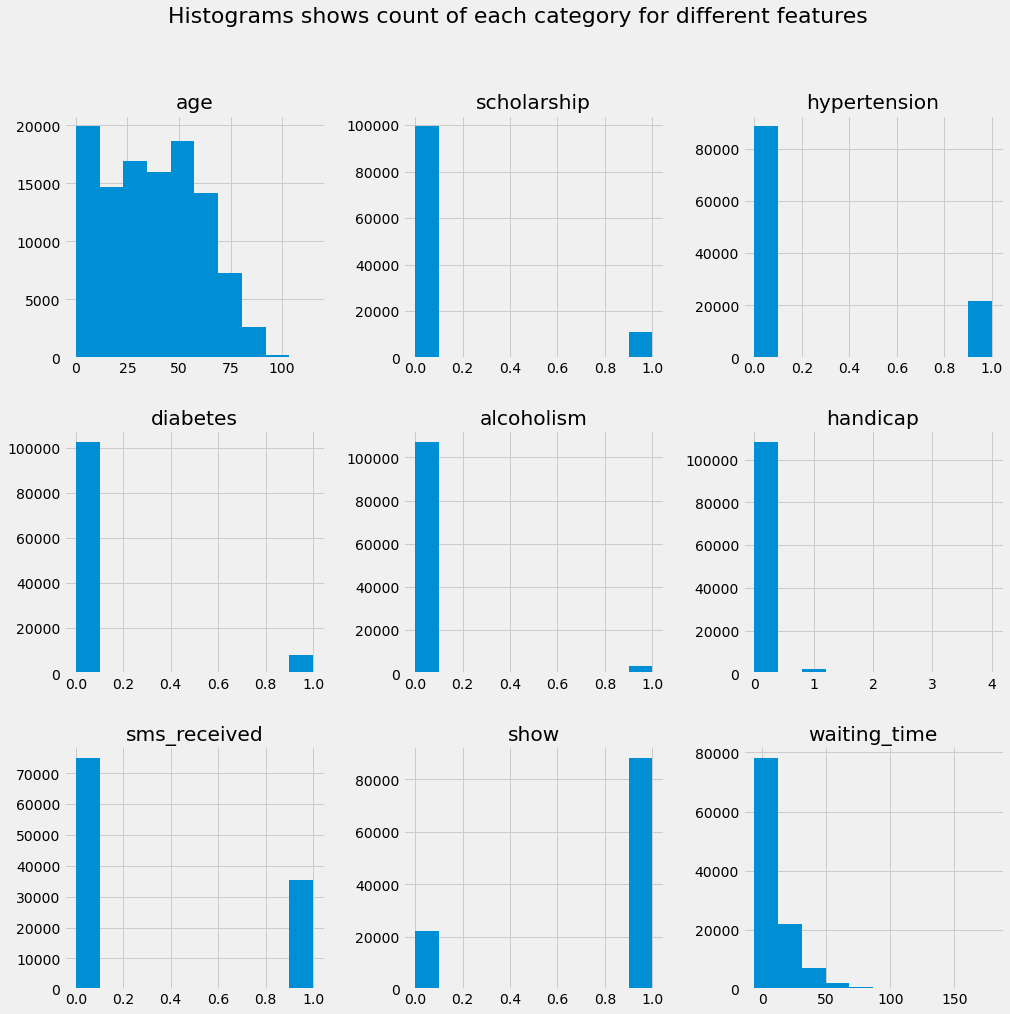

In [30]:
df_copy.hist(figsize=(15,15),grid=True);
plt.suptitle('Histograms shows count of each category for different features', fontsize=22);

#### Some observations:

 - Age date is right skewed wich means data includes more young patients than old!
 - Percentage of Alcoholisim and Handcap is extremly low among patients in this dataset.
 - Percentage of patients who have diabetes and patients who have a scholarship doesn't exceed 5%.
 - Percentage of patients who have hipertension as around 23% which is noticable.
 - SMS have been sent to more than 30% of cases.

### Show correlation and visualize it

In [31]:
# Correlation between Show and other variables
df.corr()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show,waiting_time
age,1.000000,-0.092463,0.504586,0.292391,0.095810,0.078032,0.012633,0.060327,0.034811
scholarship,-0.092463,1.000000,-0.019730,-0.024894,0.035022,-0.008587,0.001192,-0.029134,-0.030423
hypertension,0.504586,-0.019730,1.000000,0.433085,0.087970,0.080083,-0.006270,0.035704,-0.017218
diabetes,0.292391,-0.024894,0.433085,1.000000,0.018473,0.057530,-0.014552,0.015181,-0.027190
alcoholism,0.095810,0.035022,0.087970,0.018473,1.000000,0.004647,-0.026149,0.000197,-0.038520
handicap,0.078032,-0.008587,0.080083,0.057530,0.004647,1.000000,-0.024162,0.006077,-0.019844
sms_received,0.012633,0.001192,-0.006270,-0.014552,-0.026149,-0.024162,1.000000,-0.126428,0.398143
show,0.060327,-0.029134,0.035704,0.015181,0.000197,0.006077,-0.126428,1.000000,-0.186228
waiting_time,0.034811,-0.030423,-0.017218,-0.027190,-0.038520,-0.019844,0.398143,-0.186228,1.000000


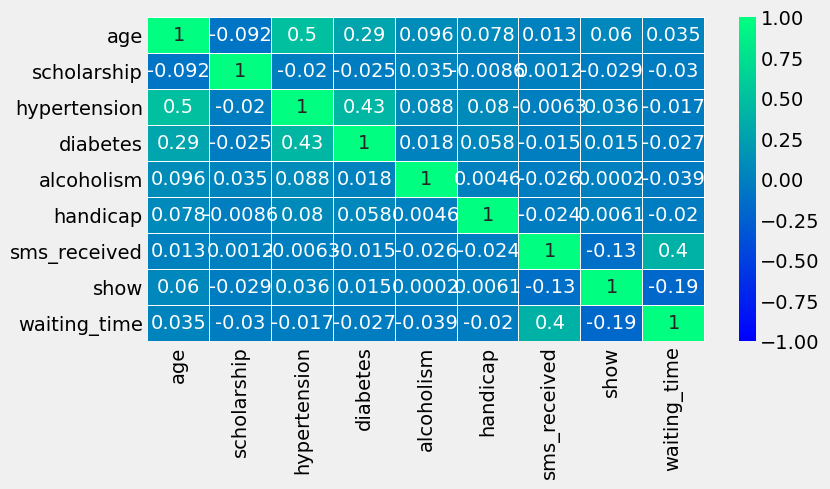

In [32]:
# Visualize correlation 
plt.figure(figsize = (8, 4), dpi = 100)
sns.heatmap(df_copy.corr(), vmin = -1, vmax = 1, cmap = "winter", linewidths=0.01, annot=True);

**There is no strong correlation between Show up and any other feature. However, there is a strong positive correlation between Hipertension on one hand and Age, and Diabetic on the other hand.**

### Question 1 (What is the percentage of patients who show up on their appointements vs. who don't?)

In [33]:
#First we count who show up and who don't
show_num=df_copy[df_copy['show']==1].count()['patient_id']
no_show_num=df_copy[df_copy['show']==0].count()['patient_id']

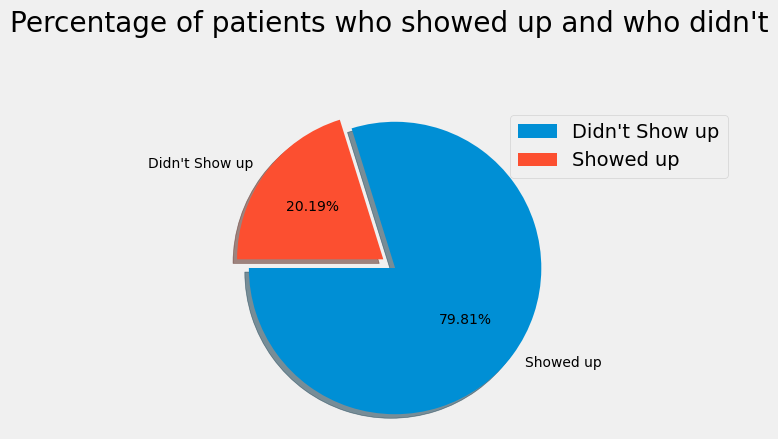

In [69]:
# Visualize amswer
data=[show_num,no_show_num]
labels=['Showed up',"Didn't Show up"]
plt.figure(figsize = (8,4), dpi = 100)
plt.pie(x=data, labels=labels,radius=1,autopct='%0.2f%%',shadow=1,startangle=180,explode=(0,0.10),textprops = {"fontsize":10});
plt.title("Percentage of patients who showed up and who didn't",y=1.2);
plt.legend(["Didn't Show up", "Showed up"]); #change legend for each color of data
plt.axis('equal');

**Answer:**
- Percentage of patients who show up on their appointments represents 79.8%
- Percentage of patients who Don't show up on their appointments represents 20.2%

### Question 2  (Dose certain gender has more commitment to medical schedules than the other one?)

In [36]:
a=df_copy.groupby(['gender','show']).count()
a

patient_id  appointment_id  scheduled_day  appointment_day  \
gender show                                                               
F      0          14594           14594          14594            14594   
       1          57245           57245          57245            57245   
M      0           7725            7725           7725             7725   
       1          30962           30962          30962            30962   

               age  neighbourhood  scholarship  hypertension  diabetes  \
gender show                                                              
F      0     14594          14594        14594         14594     14594   
       1     57245          57245        57245         57245     57245   
M      0      7725           7725         7725          7725      7725   
       1     30962          30962        30962         30962     30962   

             alcoholism  handicap  sms_received  waiting_time  \
gender show                                                     
F      0          14594     14594         14594         14594   
       1          57245     57245         57245         57245   
M      0           7725      7725          7725          7725   
       1          30962     30962         30962         30962   

             appointment_day_week  
gender show                        
F      0                    14594  
       1                    57245  
M      0                     7725  
       1                    30962

<Figure size 800x400 with 0 Axes>

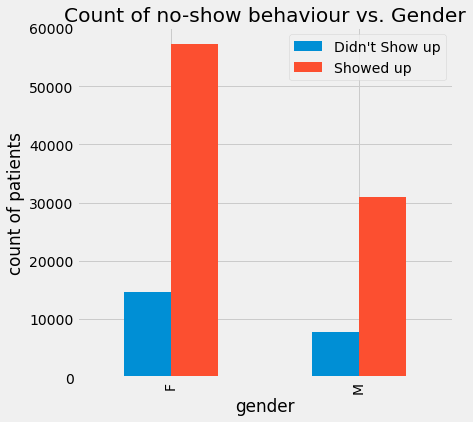

In [39]:
#Visualize for the grouped dataframe
plt.figure(figsize = (8,4), dpi = 100);
a["patient_id"].unstack().plot(kind="bar",stacked=False,figsize=(6,6),grid=True);
plt.title("Count of no-show behaviour vs. Gender"); #change title for the plot
plt.legend(["Didn't Show up", "Showed up"]); #change legend for each color of data
plt.ylabel("count of patients");

### **Another way to solve second question**

In [63]:
# defining a function to plot the percentage of showing up and not showing up and also to print them based on a variable 
def bar_chart(column):
    print(df_copy.groupby(column)['show'].value_counts(normalize=True).unstack(column))
    df_copy.groupby(column)['show'].value_counts(normalize=True).unstack(column).plot.bar(figsize=(10, 8), rot=0, width=0.9)
    plt.title('{} and showing up percentage'.format(column).title(), fontsize = 14, )
    plt.ylabel('percentage'.title(), fontsize = 10, weight = "bold")
    plt.xlabel('{}'.format('show').title(), fontsize = 10) ;

gender         F         M
show                      
0       0.203149  0.199679
1       0.796851  0.800321


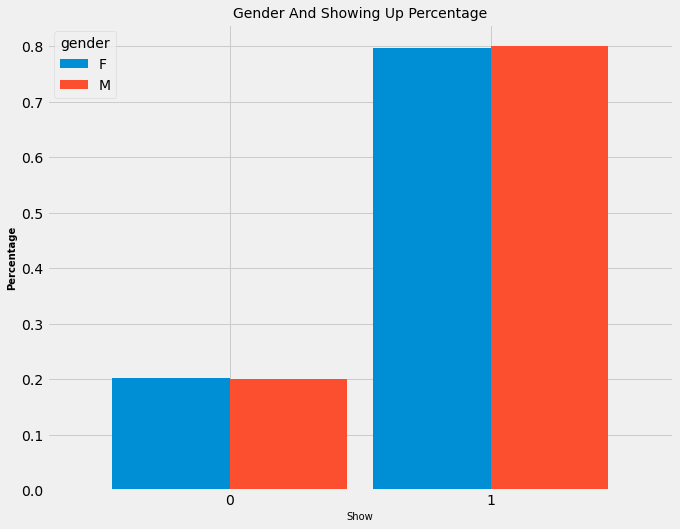

In [64]:
#plotting the percentages of showing up and not showing up and printing them based on the gender
bar_chart('gender')

>- this graph shows that most women shows up on their appointment and so do men.
>- We will compare deeply by calculate each gender porpotion

**First We will calculate the percentage of males who attend their appointments among all males in the data**

In [37]:
#first  for all males
male_df=df_copy[df_copy['gender']=="M"]
mal_num=male_df['patient_id'].count()
#males who just show up
male_show_df=male_df[male_df['show']==1]
male_num_show=male_show_df['patient_id'].count()
#calculate percentage of males who attend their appointments among all males in the data
male_precnt=(male_num_show/mal_num*100)
print('percentage of males who attend their appointments = {}'.format(round(male_precnt,2)))


percentage of males who attend their appointments = 80.03


**We will repeat for females calculating the percentage of females who attend their appointments among all males in the data**

In [38]:
#first  for all females
female_df=df_copy[df_copy['gender']=="F"]
femal_num=female_df['patient_id'].count()
#females who just show up
female_show_df=female_df[female_df['show']==1]
female_num_show=female_show_df['patient_id'].count()
#calculate percentage of males who attend their appointments among all males in the data
female_precnt=(female_num_show/femal_num*100)
print('percentage of males who attend their appointments = {}'.format(round(female_precnt,2)))


percentage of males who attend their appointments = 79.69


**Answer**
- Both genders have same commitment to medical schedules.

### Question 3  (Is the duration between registeration and appointment affect the ability to show up ?)

In [39]:
df_copy.groupby("show").mean()["waiting_time"]

show
0    15.831489
1     8.754759
Name: waiting_time, dtype: float64

**Answer:**
>- Patients Who didn't show up have an average of 15 days between registeration day and their appointments.
>- Patients Who show up have an average of 8 days between registeration day and their appointments.
>- As Duration increases, the ability of patients to show up on their appointments decreases.

### Question 4 (Where is the most appointments take place?)

In [40]:
most = df_copy['neighbourhood'].mode()
most

0    JARDIM CAMBURI
dtype: object

**Answer:**
>- The most appointments take place is **JARDIM CAMBURI**.


### Question 5 (What is age distribution of diabetes who showed and did not show up?)

In [41]:
age_categorization= df_copy["age"] #Assign age column to new variable
ages = age_categorization
bins = [1,18, 40,70,115]
labels = [ '1-17','18-39', '40-69','70-115']
df_copy['age_range'] = pd.cut(age_categorization, bins, labels = labels,include_lowest = True)
#Giving each individual to a specific group according to his age 

In [42]:
df_copy.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show,waiting_time,appointment_day_week,age_range
0,29872499824296.0,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,0,Friday,40-69
1,558997776694438.0,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,0,Friday,40-69
2,4262962299951.0,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,0,Friday,40-69
3,867951213174.0,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,0,Friday,1-17
4,8841186448183.0,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1,0,Friday,40-69


Text(0.5, 0, 'Patients age')

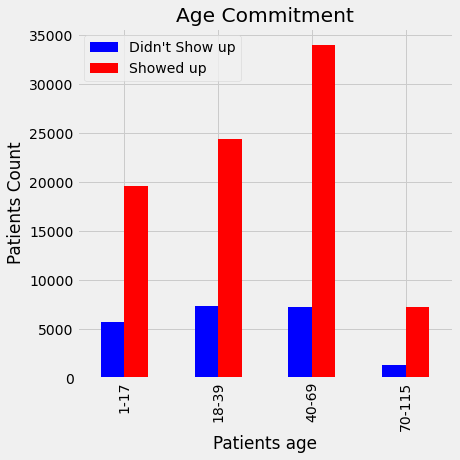

In [43]:
age_show=df_copy.groupby(["age_range","show"]).count() 

age_show["patient_id"].unstack().plot(kind="bar",stacked=False,figsize=(6,6),grid=True,color=["blue","red"]);
plt.title("Age Commitment");
plt.legend(["Didn't Show up", "Showed up"]); 
plt.ylabel("Patients Count")
plt.xlabel("Patients age")

**Answer**
- From the above graph we found that older ages are more committed to show up for their medical appointments than younger ones.
- So we can say that age is directly proportional with showing up.

<a id='conclusions'></a>
# Conclusions

**Results:**
>- Percentage of patients who show up on their appointments represents 79.8%
>- Percentage of patients who Don't show up on their appointments represents 20.2%
>- Both genders have same commitment to medical schedules.
>- Patients Who didn't show up have an average of 15 days between registeration day and their appointments.
>- Patients Who show up have an average of 8 days between registeration day and their appointments.
>- As Duration increases, the ability of patients to show up on their appointments decreases.
>- "JARDIM CAMBURI" is the most frequent place.
>- Older patients are more commited to their appointments' schedules than younger ones.

**Limitations:**
>- Source of data should record timing of sending SMS to Patients to better investigate effect of this on Show ups and why it is not effective as much as expected.
>- Most of the data are categorical which made most of plots are meaningless.
>- some patients who marked as no show up, in real they may show up but on another day, this is shown on a different record but this will be better noticed and enhance result if recorded that patient has made a rescedule instead of beeing recorded as No show.
